In [1]:
from google.colab import files

Covid_airport = files.upload()

Saving covid_impact_on_airport_traffic.csv to covid_impact_on_airport_traffic.csv


In [2]:
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

Drop data fields that are irrelevant for the analysis

In [3]:
import pandas as pd

airport_df = pd.read_csv('covid_impact_on_airport_traffic.csv')

airport_df.columns

Index(['AggregationMethod', 'Date', 'Version', 'AirportName',
       'PercentOfBaseline', 'Centroid', 'City', 'State', 'ISO_3166_2',
       'Country', 'Geography'],
      dtype='object')

In [4]:
airport_df.drop(columns=['AggregationMethod','Version','ISO_3166_2','Centroid'], inplace=True)

airport_df.sort_values('PercentOfBaseline').head(10)


,Date,AirportName,PercentOfBaseline,City,State,Country,Geography
6469,2020-08-17,Dallas/Fort Worth International,0,Grapevine,Texas,United States of America (the),"POLYGON((-97.0429444313049 32.9265900261254, -..."
3904,2020-08-17,Hartsfield-Jackson Atlanta International,0,College Park,Georgia,United States of America (the),"POLYGON((-84.4299745559692 33.657852680999, -8..."
6307,2020-08-17,John F. Kennedy International,0,New York,New York,United States of America (the),"POLYGON((-73.7883961200714 40.6226989508664, -..."
2670,2020-08-17,Montreal Trudeau,0,Dorval,Quebec,Canada,"POLYGON((-73.751757144928 45.44954912446, -73...."
2845,2020-08-17,Los Angeles International,1,Los Angeles,California,United States of America (the),"POLYGON((-118.439612388611 33.9517616366508, -..."
370,2020-04-12,Santiago International Airport,4,Santiago,Santiago Province,Chile,"POLYGON((-70.8043956756592 -33.3719683869737, ..."
1702,2020-04-10,Halifax International,5,Halifax,Nova Scotia,Canada,"POLYGON((-63.5266613960266 44.8984438169036, -..."
118,2020-10-04,Kingsford Smith,6,Sydney,New South Wales,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
383,2020-04-26,Santiago International Airport,7,Santiago,Santiago Province,Chile,"POLYGON((-70.8043956756592 -33.3719683869737, ..."
35,2020-04-10,Kingsford Smith,8,Sydney,New South Wales,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


We notice after sorting that 17th August has PercentOfBaseline as low as 0 in USA and Canada\
\
As the PercentOfBaseline is a proportion of date's trips to the avg number of trips, these occurances could be due to the closure of borders in those particular countries within the dataset. However more data would be required to assert this assumption

In [5]:
airport_df['Date'] = pd.to_datetime(airport_df['Date'])

airport_df['Month'] = airport_df.Date.dt.month

df2 is th number of airports in a country\
df2_frequency is the number of reported traffics in each country's airports

In [6]:
df2 = airport_df.groupby(['Month','Country'], as_index= False)[['AirportName']].nunique()
df2


,Month,Country,AirportName
0,3,Australia,1
1,3,Canada,9
2,3,Chile,1
3,3,United States of America (the),17
4,4,Australia,1
5,4,Canada,9
6,4,Chile,1
7,4,United States of America (the),17
8,5,Australia,1
9,5,Canada,9


In [7]:
h = airport_df.groupby(['Month','Country', 'AirportName'], as_index= False)[['PercentOfBaseline']].mean()
h.head(20)

,Month,Country,AirportName,PercentOfBaseline
0,3,Australia,Kingsford Smith,83.1250
1,3,Canada,Calgary International,90.6250
2,3,Canada,Edmonton International,62.6000
3,3,Canada,Halifax International,46.0625
4,3,Canada,Hamilton International,89.8000
5,3,Canada,Montreal Mirabel,76.1250
6,3,Canada,Montreal Trudeau,80.6875
7,3,Canada,Toronto Pearson,66.6250
8,3,Canada,Vancouver International,86.2500
9,3,Canada,Winnipeg International,94.7500


df3 shows the average traffic extent in each country per month


In [8]:
df3 = airport_df.groupby(['Month','Country'], as_index = False)[['PercentOfBaseline']].mean()

df3.head()

,Month,Country,PercentOfBaseline
0,3,Australia,83.125000
1,3,Canada,77.070423
2,3,Chile,38.400000
3,3,United States of America (the),70.180147
4,4,Australia,53.241379


Text(0.5, 1.0, 'Average Traffic per Month')

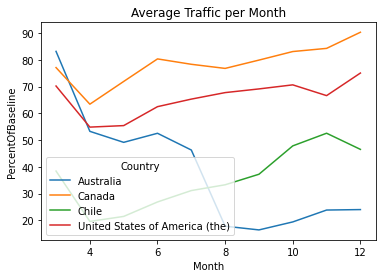

In [10]:
sn.lineplot(data = df3, x = 'Month', y = 'PercentOfBaseline', hue = 'Country').set_title('Average Traffic per Month')

**Observation**; The line graph above clearly shows that the trend of average monthly traffics throughout the year varies greatly between the 4 countries. Canada and USA, for instance, seem to have a generally upward trend, zhile Australia's traffic significantly drops downn around the month of Jully. \
\
**Hypothesis**; The variation in these trends could be attributed to the different kinds of restrictions put in place by different countries in response to the pandemic.\
\
**Conclusion**; To acertain this assuption, we'd require further data about the COVID 19 protocols in each country and data about traffics in previous years.\
Let us now compare how each country's airport has handled their respective traffics on a quarterly basis

In [9]:
airport_df['Quarters'] = airport_df.Date.dt.quarter
countries_comparision = airport_df.groupby(['Quarters','Country'], as_index= False)[['PercentOfBaseline']].mean()

countries_comparision.head()

,Quarters,Country,PercentOfBaseline
0,1,Australia,83.125000
1,1,Canada,77.070423
2,1,Chile,38.400000
3,1,United States of America (the),70.180147
4,2,Australia,51.573034


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


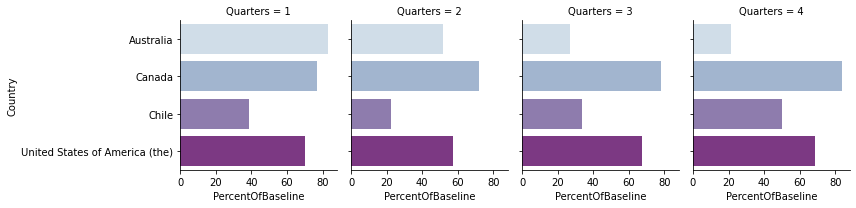

In [10]:
Lat = sn.FacetGrid(countries_comparision, col = 'Quarters')
Lat.map(sn.barplot, 'PercentOfBaseline', 'Country', palette= 'BuPu' )

From the above visualisation, we infer that though  USA and Canada are the countries with the most airports in our dataset, they experienced most traffic in almost every quarter.\
Based on this data analysis, the USA ad Canad's airsports were the most affected by the pandemic. \
\
Knowing this, we can further our analysis by looking at how each part of these countries were affected along the year. Also, though it would necessite additional data with a larger sample size, we could also try to see if there is any correlation between the number of airports in a country and the traffic it experiences.

In [11]:
airports_comparision = airport_df.groupby(['Quarters', 'Month', 'Country', 'State'], as_index= False)[['PercentOfBaseline']].agg('mean','count')

Canada_df = airports_comparision[airports_comparision['Country']=='Canada'].sort_values(by = 'PercentOfBaseline', ascending = False)
USA_df = airports_comparision[airports_comparision['Country']=='United States of America (the)'].sort_values(by = 'PercentOfBaseline', ascending = False)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


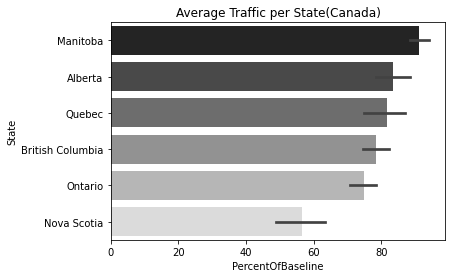

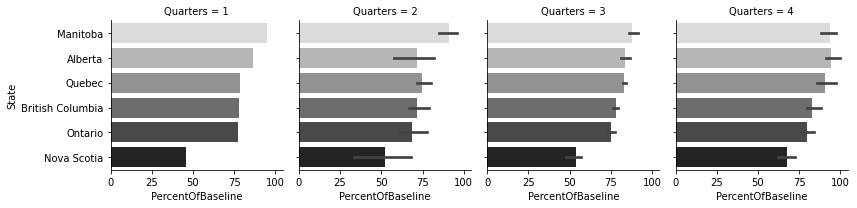

In [12]:

sn.barplot(data = Canada_df,y = 'State', x ='PercentOfBaseline', palette = 'gray').set_title('Average Traffic per State(Canada)')

sn.FacetGrid(Canada_df, col = 'Quarters').map(sn.barplot,'PercentOfBaseline','State', palette = 'gray_r')


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


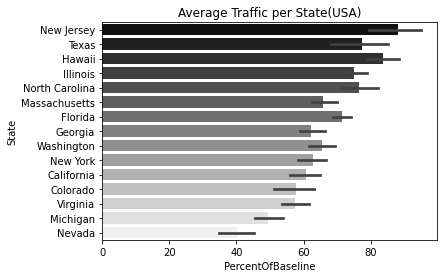

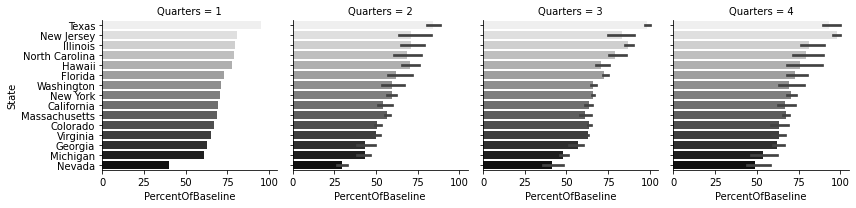

In [13]:
sn.barplot(data = USA_df,y = 'State', x ='PercentOfBaseline', palette = 'gray').set_title('Average Traffic per State(USA)')

sn.FacetGrid(USA_df, col = 'Quarters').map(sn.barplot,'PercentOfBaseline','State', palette = 'gray_r')
